# Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_classification

In [3]:
X,Y = make_classification(n_samples=1000,n_features=2,n_informative=2,n_repeated=0,n_redundant=0,n_classes=2,n_clusters_per_class=1,random_state=0)

In [4]:
print(X.shape)
print(Y.shape)

(1000, 2)
(1000,)


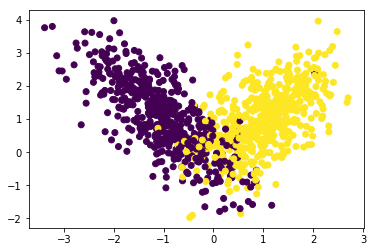

In [5]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [6]:
ones = np.ones((1000,1))
print(ones.shape)

X_train = np.hstack((ones,X))
print(X_train.shape)
print(X_train)

(1000, 1)
(1000, 3)
[[ 1.         -0.4002285  -0.92688039]
 [ 1.          1.07610199  1.18029069]
 [ 1.         -0.92295314  0.30616655]
 ...
 [ 1.         -2.37673965  3.03728951]
 [ 1.         -1.07726236  1.45397626]
 [ 1.          1.38028997  0.87341245]]


In [7]:
def h(x,theta):
    return 1.0/(1+np.exp(-np.dot(x,theta)))

def cost(X,Y,theta):
    m = X.shape[0]
    cost = 0 
    for i in range(m):
        hx = h(X[i],theta)
        cost += Y[i]*np.log(hx) + (1-Y[i])*np.log(1-hx)   
    return cost

def grad(X,Y,theta):
    m = X.shape[0]
    n = X.shape[1]
    grad = np.zeros((n,))
    for i in range(m):
        for j in range(n):
            hx = h(X[i],theta)
            grad[j] += (Y[i] - hx)*X[i][j]
    return grad/m

def gradientAscent(X,Y,learning_rate=0.1):
    m = X.shape[0]
    n = X.shape[1]
    theta = np.zeros((n,))
    costs = []
    for epoch in range(1000):
        g = grad(X,Y,theta)        
        for j in range(n):
            theta[j] = theta[j] + learning_rate*g[j]

        costs.append(cost(X,Y,theta))
    return theta,costs

In [8]:
theta,costs = gradientAscent(X_train,Y)

[-0.31835844  3.40944912  0.49993085]


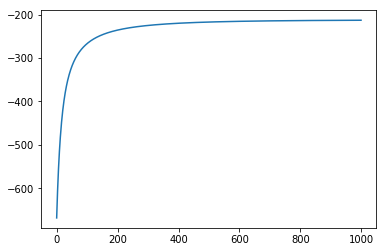

-212.87529564245796


In [9]:
print(theta)
plt.plot(costs)
plt.show()
print(costs[-1])

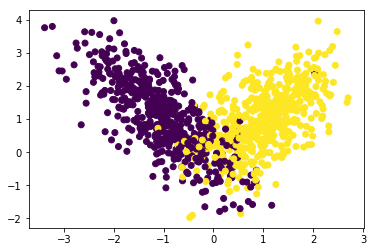

In [10]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [11]:
xtest = np.linspace(-1,1,10)
print(xtest)

[-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
  0.33333333  0.55555556  0.77777778  1.        ]


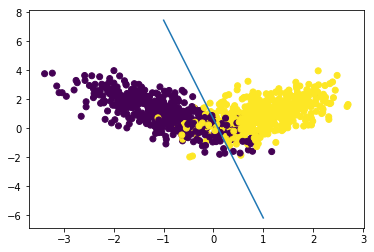

In [12]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.plot(xtest,-(theta[0]+theta[1]*xtest)/theta[2])
plt.show()